# WeatherPy

---

## Code to Generate Random Geographic Coordinates and a List of Cities

In [81]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [82]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 610


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [83]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

query_url = f"{url}appid={weather_api_key}&units=metric&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    response = requests.get(city_url).json()

    try:
        # Parse the JSON and retrieve data
        city_weather = response["weather"]

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response["coord"]["lat"]
        city_lng = response["coord"]["lon"]
        city_max_temp = response["main"]["temp_max"]
        city_humidity = response["main"]["humidity"]
        city_clouds = response["clouds"]["all"]
        city_wind = response["wind"]["speed"]
        city_country = response["sys"]["country"]
        city_date = response["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
# print(response)

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | anadyr
Processing Record 2 of Set 1 | yellowknife
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | emerald
Processing Record 6 of Set 1 | waitangi
Processing Record 7 of Set 1 | korla
Processing Record 8 of Set 1 | kununurra
Processing Record 9 of Set 1 | vila velha
Processing Record 10 of Set 1 | adamstown
Processing Record 11 of Set 1 | port alfred
Processing Record 12 of Set 1 | blackmans bay
Processing Record 13 of Set 1 | bethel
Processing Record 14 of Set 1 | vernon
Processing Record 15 of Set 1 | burley
Processing Record 16 of Set 1 | avarua
Processing Record 17 of Set 1 | lompoc
Processing Record 18 of Set 1 | ribeira grande
Processing Record 19 of Set 1 | hobyo
Processing Record 20 of Set 1 | kristiansund
Processing Record 21 of Set 1 | hamilton
Processing Record 22 of Set 1 | west island
Processing Record 23 of Set 1 |

In [84]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          586
Lat           586
Lng           586
Max Temp      586
Humidity      586
Cloudiness    586
Wind Speed    586
Country       586
Date          586
dtype: int64

In [85]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,anadyr,64.7500,177.4833,-15.72,51,92,10.00,RU,1706935968
1,yellowknife,62.4560,-114.3525,-12.71,92,100,4.12,CA,1706935969
2,port-aux-francais,-49.3500,70.2167,7.29,87,38,5.08,TF,1706935969
3,albany,42.6001,-73.9662,-0.51,79,82,0.89,US,1706935715
4,emerald,-23.5333,148.1667,35.75,39,5,5.63,AU,1706935969


In [86]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [87]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,anadyr,64.7500,177.4833,-15.72,51,92,10.00,RU,1706935968
1,yellowknife,62.4560,-114.3525,-12.71,92,100,4.12,CA,1706935969
2,port-aux-francais,-49.3500,70.2167,7.29,87,38,5.08,TF,1706935969
3,albany,42.6001,-73.9662,-0.51,79,82,0.89,US,1706935715
4,emerald,-23.5333,148.1667,35.75,39,5,5.63,AU,1706935969


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

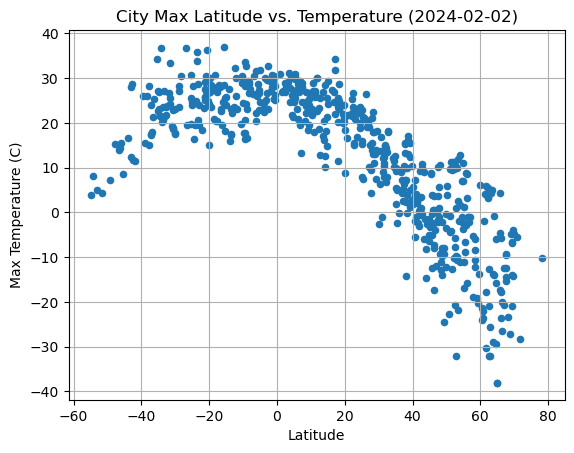

In [88]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(kind="scatter", x=["Lat"], y=["Max Temp"], grid=True)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude vs. Temperature (2024-02-02)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

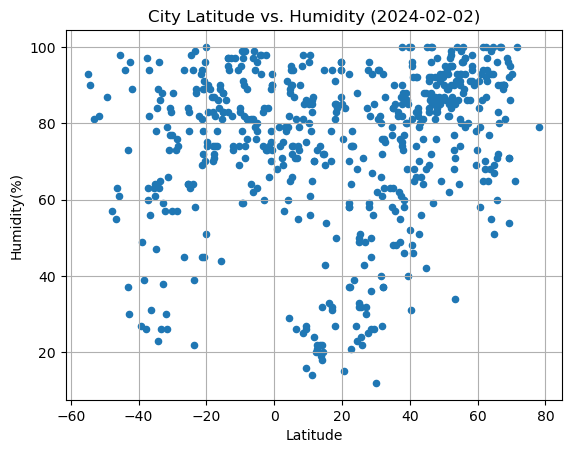

In [89]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind="scatter", x=["Lat"], y=["Humidity"], grid=True)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.title("City Latitude vs. Humidity (2024-02-02)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

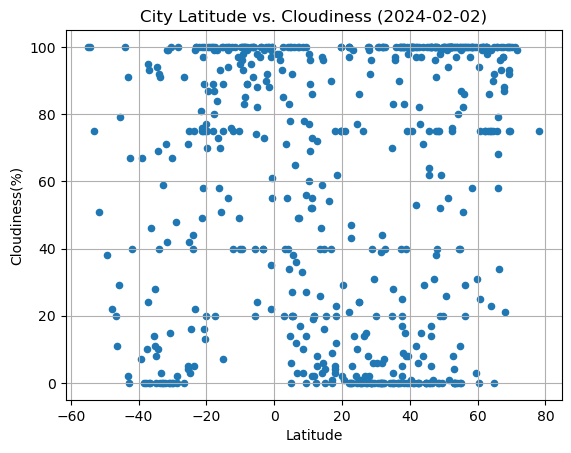

In [90]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind="scatter", x=["Lat"], y=["Cloudiness"], grid=True)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.title("City Latitude vs. Cloudiness (2024-02-02)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

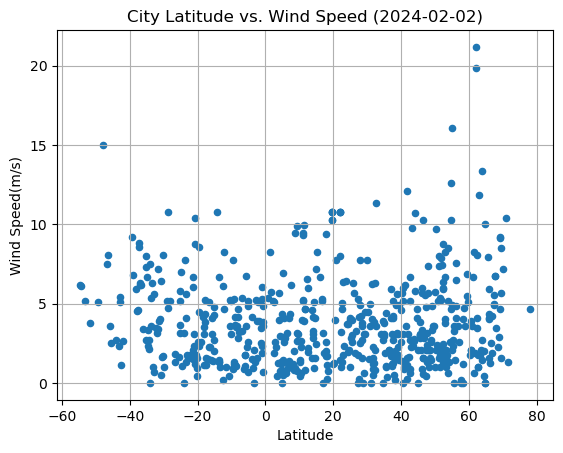

In [91]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind="scatter", x=["Lat"], y=["Wind Speed"], grid=True)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(m/s)")
plt.title("City Latitude vs. Wind Speed (2024-02-02)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [92]:
# Define a function to create Linear Regression plots
def scatter_plot(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = slope * x_values + intercept
    line_equation = f"y = {round(slope,2)}x + {round(intercept,2)}"
    print(f"The r-value is: {rvalue}")
    plt.scatter(x_values, y_values)
    plt.plot(x_values,regress_values,"r-")
    return line_equation
    

In [93]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0, :]

# Display sample data
northern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,anadyr,64.7500,177.4833,-15.72,51,92,10.00,RU,1706935968
1,yellowknife,62.4560,-114.3525,-12.71,92,100,4.12,CA,1706935969
3,albany,42.6001,-73.9662,-0.51,79,82,0.89,US,1706935715
6,korla,41.7597,86.1469,-2.98,74,53,1.10,CN,1706935969
12,bethel,41.3712,-73.4140,2.19,68,0,3.60,US,1706935970


In [94]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,port-aux-francais,-49.3500,70.2167,7.29,87,38,5.08,TF,1706935969
4,emerald,-23.5333,148.1667,35.75,39,5,5.63,AU,1706935969
5,waitangi,-43.9535,-176.5597,16.57,94,100,2.68,NZ,1706935969
7,kununurra,-15.7667,128.7333,36.99,44,51,4.12,AU,1706935969
8,vila velha,-20.3297,-40.2925,24.97,96,75,1.79,BR,1706935969


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8590450709939351


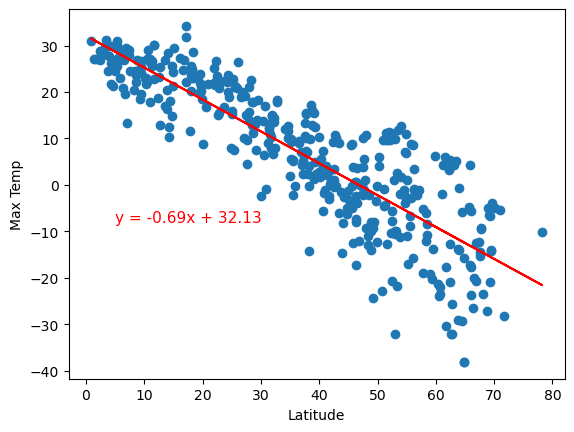

In [95]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

line_equation = scatter_plot(x_values, y_values)
plt.annotate(line_equation,(5, -8), fontsize=11, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()

The r-value is: 0.5031479365665827


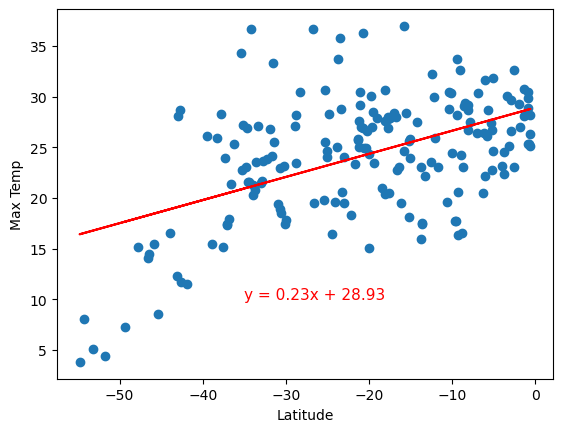

In [96]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

line_equation = scatter_plot(x_values, y_values)
plt.annotate(line_equation,(-35, 10), fontsize=11, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()


**Discussion about the linear relationship:**  Latitude in Northern Hemisphere has negative correlation with temperature since the r value is -ve and Latitude in southern hemisphere has moderately strong correlation with Temperature since the r-value is > 0.5

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.37221494797344057


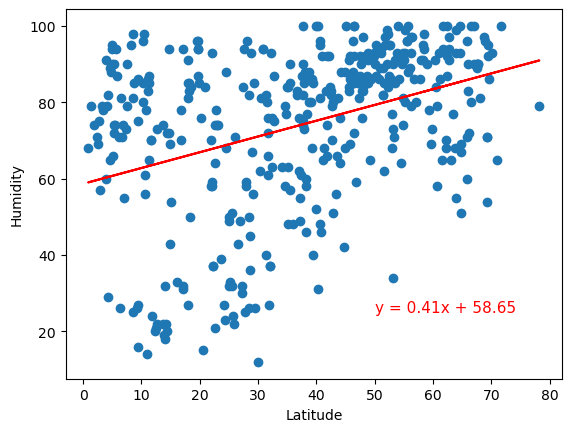

In [97]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

line_equation = scatter_plot(x_values, y_values)
plt.annotate(line_equation,(50, 25), fontsize=11, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

The r-value is: 0.31461194736383524


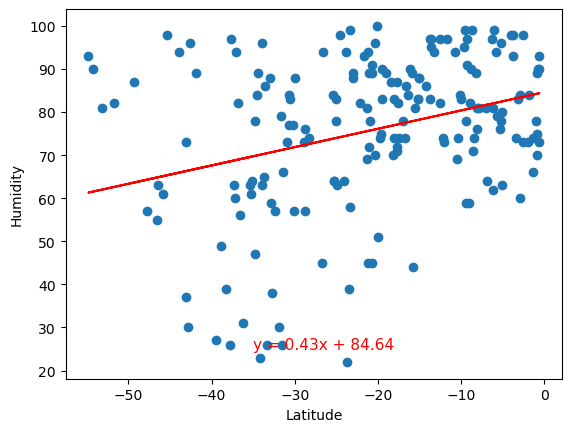

In [98]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

line_equation = scatter_plot(x_values, y_values)
plt.annotate(line_equation,(-35, 25), fontsize=11, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

**Discussion about the linear relationship:** Latitude in both Northern and Southern Hemisphere has weak correlation with Humidity since the r-value is > 0.3 and < 0.5

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.2903667336383984


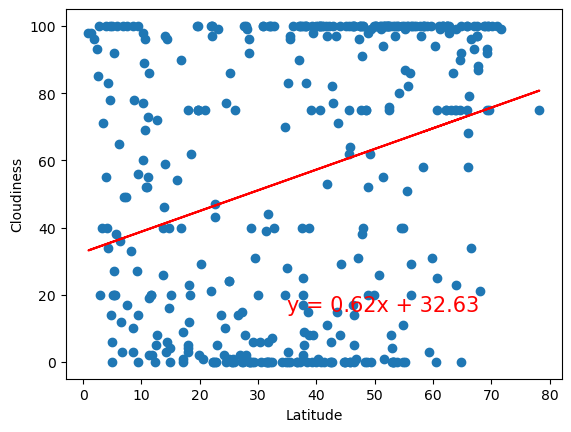

In [99]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

line_equation = scatter_plot(x_values, y_values)
plt.annotate(line_equation,(35, 15), fontsize=15, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

The r-value is: 0.4383650988962493


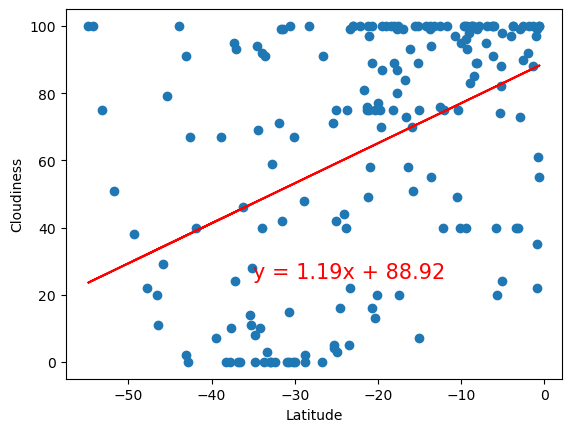

In [100]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

line_equation = scatter_plot(x_values, y_values)
plt.annotate(line_equation,(-35, 25), fontsize=15, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

**Discussion about the linear relationship:** Latitude in both Northern and Southern hemisphere has weak correlation with Cloudiness because r-value in both is < 0.5

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.10774864266564543


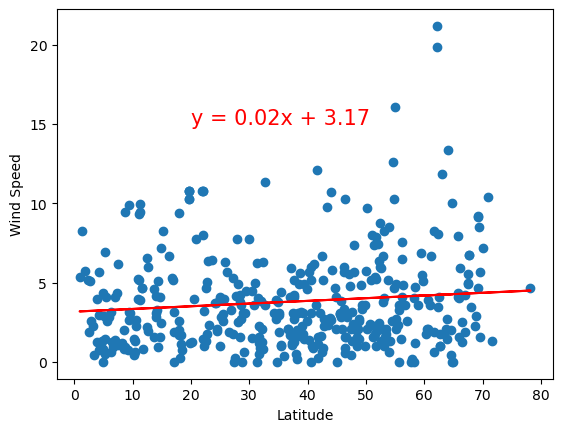

In [101]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

line_equation = scatter_plot(x_values, y_values)
plt.annotate(line_equation,(20, 15), fontsize=15, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

The r-value is: -0.2995851509311767


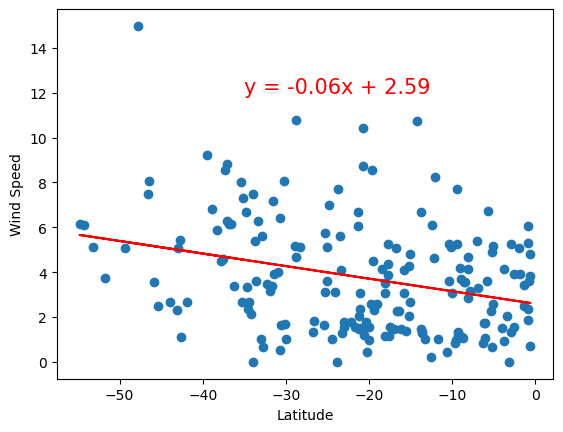

In [102]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

line_equation = scatter_plot(x_values, y_values)
plt.annotate(line_equation,(-35, 12), fontsize=15, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

**Discussion about the linear relationship:** Latiutude in both Northern and Southern hemisphere has very weak correlation against wind speed since the r-value is < 0.3 